![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 1 - Hearth disease classification</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/MainClassificationExercise01_Heart.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Load the dataset:
https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
dData = pd.read_csv('heart.csv')
dData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Rename columns:

In [4]:
dData.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestECG', 'MaxHeartRateAchieved',
                 'ExerciseInducedAngina', 'StDepression', 'StSlope', 'NumMajorVessels', 'Thalassemia', 'Target']
dData

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,StDepression,StSlope,NumMajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Meaningful categorical data:
(Based on the data description)

In [5]:
dData.loc[dData['Sex']                   == 0, 'Sex']                   = 'female'
dData.loc[dData['Sex']                   == 1, 'Sex']                   = 'male'
        
dData.loc[dData['ChestPainType']         == 0, 'ChestPainType']         = 'asymptomatic'
dData.loc[dData['ChestPainType']         == 1, 'ChestPainType']         = 'atypical angina'
dData.loc[dData['ChestPainType']         == 2, 'ChestPainType']         = 'non-anginal pain'
dData.loc[dData['ChestPainType']         == 3, 'ChestPainType']         = 'typical angina'

dData.loc[dData['FastingBloodSugar']     == 0, 'FastingBloodSugar']     = 'lower than 120mg/ml'
dData.loc[dData['FastingBloodSugar']     == 1, 'FastingBloodSugar']     = 'greater than 120mg/ml'

dData.loc[dData['RestECG']               == 0, 'RestECG']               = 'normal'
dData.loc[dData['RestECG']               == 1, 'RestECG']               = 'ST-T wave abnormality'
dData.loc[dData['RestECG']               == 2, 'RestECG']               = 'left ventricular hypertrophy'

dData.loc[dData['ExerciseInducedAngina'] == 0, 'ExerciseInducedAngina'] = 'no'
dData.loc[dData['ExerciseInducedAngina'] == 1, 'ExerciseInducedAngina'] = 'yes'

dData.loc[dData['StSlope']               == 1, 'StSlope']               = 'upsloping'
dData.loc[dData['StSlope']               == 2, 'StSlope']               = 'flat'
dData.loc[dData['StSlope']               == 3, 'StSlope']               = 'downsloping'

dData.loc[dData['Thalassemia']           == 1, 'Thalassemia']            = 'normal'
dData.loc[dData['Thalassemia']           == 2, 'Thalassemia']            = 'fixed defect'
dData.loc[dData['Thalassemia']           == 3, 'Thalassemia']            = 'reversable defect'

dData.loc[dData['Target']                == 0, 'Target']                 = 'hearth disease'
dData.loc[dData['Target']                == 1, 'Target']                 = 'no hearth disease'
dData

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,StDepression,StSlope,NumMajorVessels,Thalassemia,Target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,no hearth disease
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,no hearth disease
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,no hearth disease
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,no hearth disease
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,no hearth disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,upsloping,0,reversable defect,hearth disease
299,45,male,non-anginal pain,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,upsloping,0,reversable defect,hearth disease
300,68,male,0,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,upsloping,2,reversable defect,hearth disease
301,57,male,0,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,upsloping,1,reversable defect,hearth disease


In [6]:
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Sex                    303 non-null    object 
 2   ChestPainType          303 non-null    object 
 3   RestingBloodPressure   303 non-null    int64  
 4   Cholesterol            303 non-null    int64  
 5   FastingBloodSugar      303 non-null    object 
 6   RestECG                303 non-null    object 
 7   MaxHeartRateAchieved   303 non-null    int64  
 8   ExerciseInducedAngina  303 non-null    object 
 9   StDepression           303 non-null    float64
 10  StSlope                303 non-null    object 
 11  NumMajorVessels        303 non-null    int64  
 12  Thalassemia            303 non-null    object 
 13  Target                 303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


### Pair plot:

<ipython-input-7-d70301bef75d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dDataToPlot['Target'] = dData['Target'];


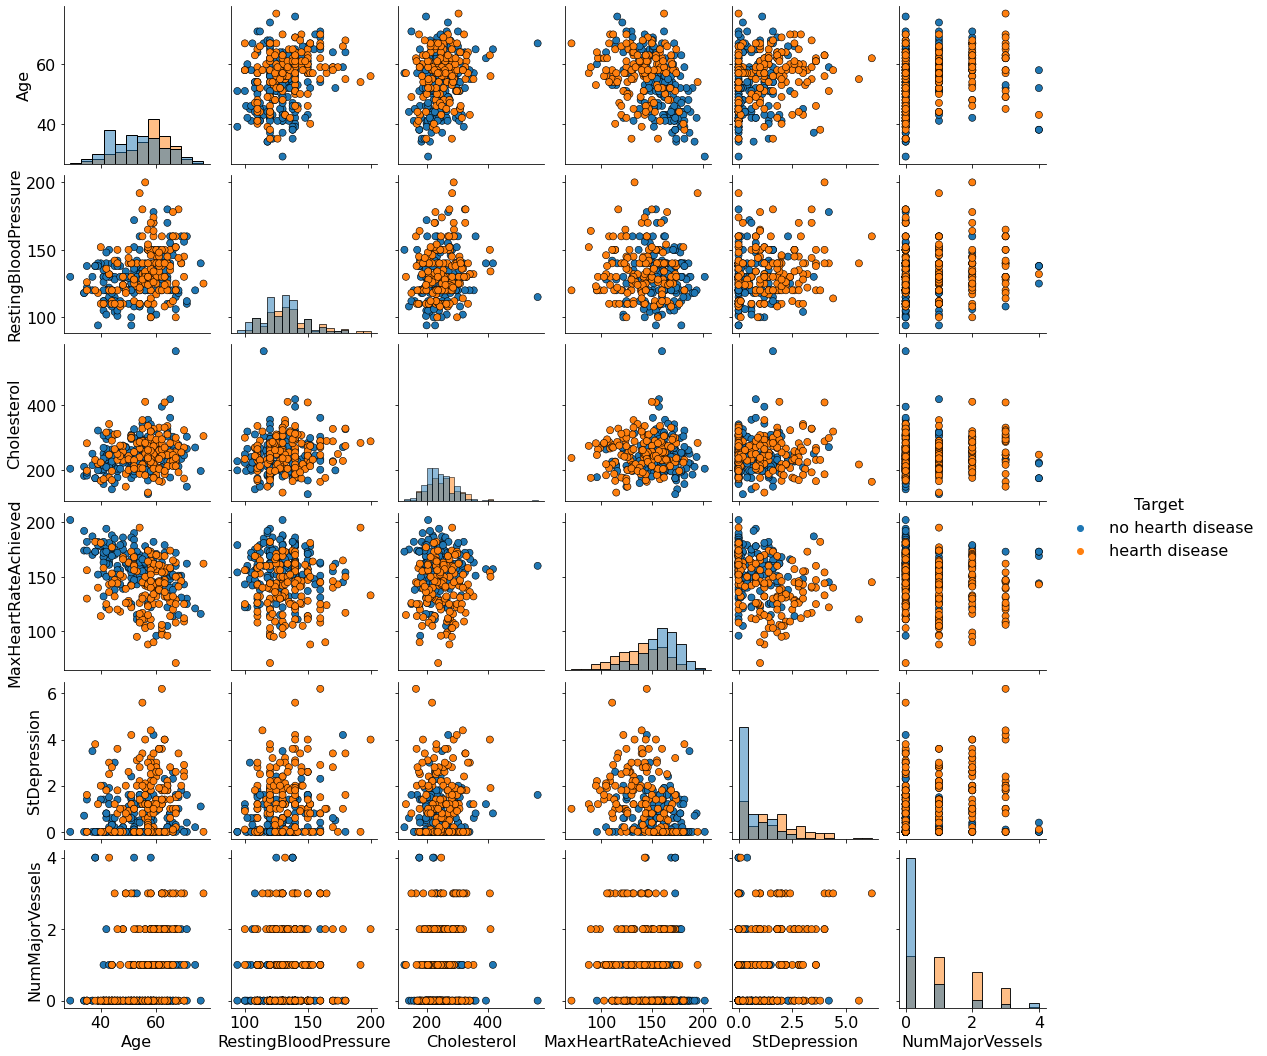

In [7]:
dDataToPlot           = dData.select_dtypes(include=['number'])
dDataToPlot['Target'] = dData['Target'];
sns.pairplot(dDataToPlot, hue='Target', diag_kind='hist', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

In [8]:
dCorr = dDataToPlot.corr()
dCorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels
Age,1.00,0.28,0.21,-0.40,0.21,0.28
RestingBloodPressure,0.28,1.00,0.12,-0.05,0.19,0.10
Cholesterol,0.21,0.12,1.00,-0.01,0.05,0.07
MaxHeartRateAchieved,-0.40,-0.05,-0.01,1.00,-0.34,-0.21
StDepression,0.21,0.19,0.05,-0.34,1.00,0.22
NumMajorVessels,0.28,0.10,0.07,-0.21,0.22,1.00


### Categorical to dummy

In [15]:
dData2 = pd.get_dummies(dData, drop_first=True)
dData2

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect,Target_no hearth disease
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
299,45,110,264,132,1.2,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [16]:
dCorr = dData2.corr()
dCorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect,Target_no hearth disease
Age,1.00,0.28,0.21,-0.40,0.21,0.28,-0.10,-0.06,0.05,-0.15,-0.12,0.08,0.14,0.10,-0.19,0.18,-0.14,0.06,0.11,-0.23
RestingBloodPressure,0.28,1.00,0.12,-0.05,0.19,0.10,-0.06,-0.05,0.15,-0.08,-0.18,0.06,0.13,0.07,-0.09,0.03,-0.14,0.08,0.11,-0.14
Cholesterol,0.21,0.12,1.00,-0.01,0.05,0.07,-0.20,-0.04,-0.05,-0.01,-0.01,0.03,0.17,0.07,-0.03,0.05,-0.00,-0.09,0.06,-0.09
MaxHeartRateAchieved,-0.40,-0.05,-0.01,1.00,-0.34,-0.21,-0.04,0.17,0.08,0.25,0.01,-0.12,-0.07,-0.38,0.45,-0.42,0.29,-0.16,-0.22,0.42
StDepression,0.21,0.19,0.05,-0.34,1.00,0.22,0.10,-0.13,0.09,-0.28,-0.01,0.17,0.10,0.29,-0.51,0.31,-0.34,0.10,0.30,-0.43
NumMajorVessels,0.28,0.10,0.07,-0.21,0.22,1.00,0.12,-0.09,-0.07,-0.13,-0.14,0.03,0.08,0.12,-0.12,0.14,-0.22,0.07,0.20,-0.39
Sex_male,-0.10,-0.06,-0.20,-0.04,0.10,0.12,1.00,-0.12,0.09,-0.04,-0.05,-0.11,0.04,0.14,-0.01,-0.01,-0.38,0.14,0.32,-0.28
ChestPainType_atypical angina,-0.06,-0.05,-0.04,0.17,-0.13,-0.09,-0.12,1.00,-0.18,-0.28,-0.08,-0.01,-0.09,-0.27,0.12,-0.11,0.21,-0.10,-0.17,0.32
ChestPainType_non-anginal pain,0.05,0.15,-0.05,0.08,0.09,-0.07,0.09,-0.18,1.00,-0.13,-0.06,-0.03,0.07,-0.09,-0.04,0.01,0.01,0.03,-0.02,0.09
ChestPainType_typical angina,-0.15,-0.08,-0.01,0.25,-0.28,-0.13,-0.04,-0.28,-0.13,1.00,0.06,-0.05,-0.09,-0.23,0.22,-0.20,0.21,-0.04,-0.19,0.25


### Same correlation plot but with SNS:

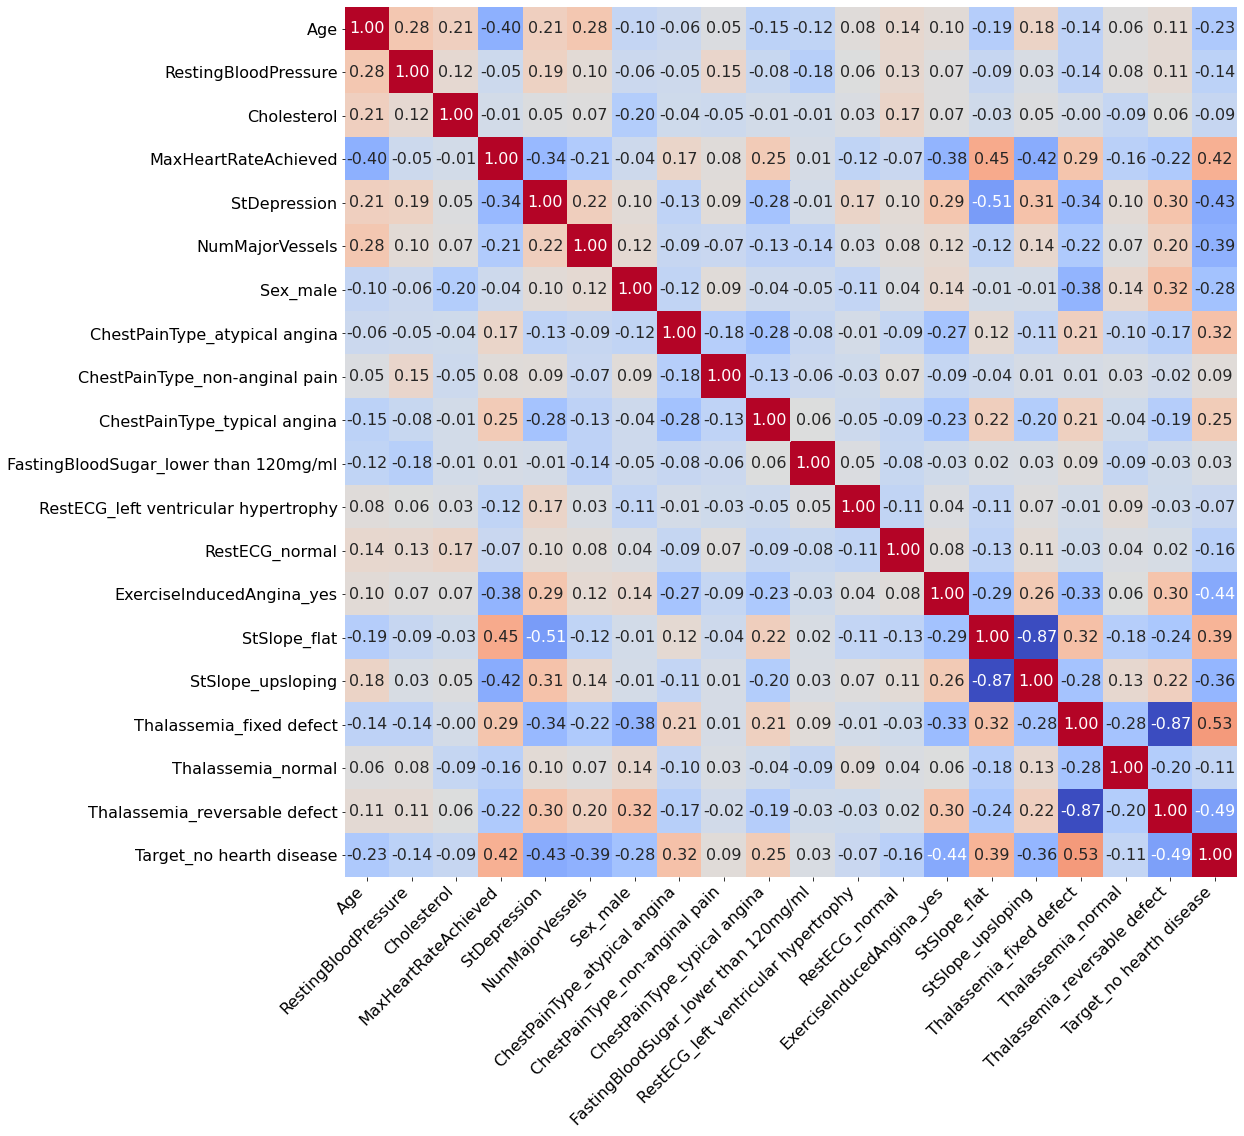

In [18]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(dData2.corr(method='pearson'), annot=True, fmt='.2f', cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Display data balance:

no hearth disease    165
hearth disease       138
Name: Target, dtype: int64

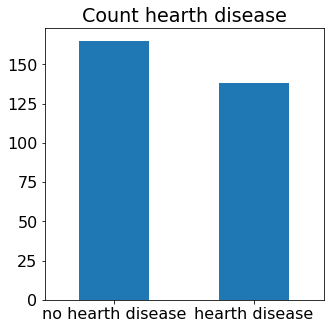

In [19]:
display(dData['Target'].value_counts())
dData['Target'].value_counts().plot(kind='bar', figsize=(5, 5), title='Count hearth disease', rot=0)
plt.show()    

### Split to features and labels:

In [20]:
dTrain = dData2.drop(columns='Target_no hearth disease')
dY     = dData2['Target_no hearth disease']

dTrain.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.683168,0.287129,0.075908,0.165017,0.851485,0.013201,0.485149,0.326733,0.468647,0.462046,0.547855,0.059406,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.466011,0.453171,0.265288,0.371809,0.356198,0.114325,0.500606,0.469794,0.499842,0.499382,0.498528,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalize the data

In [21]:
from sklearn import preprocessing

mX     = preprocessing.StandardScaler().fit_transform(dTrain)
dTrain = pd.DataFrame(mX, columns=dTrain.columns)
dTrain.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16,4.752341e-16,-1.319077e-17,3.341661e-16,1.183505e-16,-3.297692e-16,3.444256e-17,8.143468e-17,1.634190e-16,-5.203025e-16,2.147164e-16,-8.896441e-16,6.020120e-16,-1.282436e-17,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,-7.144289e-01,-1.468418e+00,-6.346478e-01,-2.866058e-01,-4.445542e-01,-2.394438e+00,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763e+00,-2.513123e-01,-7.931155e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,-7.144289e-01,-1.468418e+00,-6.346478e-01,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763e+00,-2.513123e-01,-7.931155e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,-7.144289e-01,6.810052e-01,-6.346478e-01,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,9.084609e-01,-2.513123e-01,-7.931155e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,2.650822e-01,6.810052e-01,1.575677e+00,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,9.084609e-01,-2.513123e-01,1.260850e+00
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,3.203615e+00,6.810052e-01,1.575677e+00,3.489114e+00,2.249444e+00,4.176345e-01,8.645808e+00,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,9.084609e-01,3.979112e+00,1.260850e+00


### Train a linear SVM:

In [22]:
from sklearn.svm             import SVC
from sklearn.model_selection import cross_val_score, KFold

dRes = pd.DataFrame(columns=['C', 'Accuracy'])

for C in np.linspace(1e-3, 5, 20):
    oSVM                = SVC(kernel='linear', C=C)
    vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=KFold(20, shuffle=True))
    dRes.loc[len(dRes)] = [C, vAccuracy.mean()]

dRes.sort_values(by='Accuracy', ascending=False)

,C,Accuracy
2,0.527211,0.844167
10,2.632053,0.841875
1,0.264105,0.839375
12,3.158263,0.835000
19,5.000000,0.835000
8,2.105842,0.835000
9,2.368947,0.834792
18,4.736895,0.834167
11,2.895158,0.831667
15,3.947579,0.828750


### Train a kernel SVM (Gaussian kernel):

In [23]:
dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in np.linspace(25, 75, 10):
    for σ in np.linspace(8, 12, 10):
        oSVM                = SVC(kernel='rbf', C=C, gamma=1/(2*σ**2))
        vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=KFold(20, shuffle=True))
        dRes.loc[len(dRes)] = [C, σ, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,σ,Accuracy
63,58.333333,9.333333,0.861875
75,63.888889,10.222222,0.855833
87,69.444444,11.111111,0.855000
95,75.000000,10.222222,0.854375
13,30.555556,9.333333,0.851875
...,...,...,...
36,41.666667,10.666667,0.819792
3,25.000000,9.333333,0.818958
80,69.444444,8.000000,0.817917
90,75.000000,8.000000,0.815208


### Train a kernel SVM (polynomial kernel):

In [24]:
dRes = pd.DataFrame(columns=['C', 'P', 'Accuracy'])

for C in np.linspace(1e-6, 3, 20):
    for P in range(1, 5):
        oSVM                = SVC(kernel='poly', C=C, degree=P)
        vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=KFold(20, shuffle=True))
        dRes.loc[len(dRes)] = [C, P, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,P,Accuracy
12,0.473685,1.0,0.845000
60,2.368421,1.0,0.842292
8,0.315790,1.0,0.841458
20,0.789474,1.0,0.841042
66,2.526316,3.0,0.835833
...,...,...,...
7,0.157896,4.0,0.577292
1,0.000001,2.0,0.545417
2,0.000001,3.0,0.544792
3,0.000001,4.0,0.544375


### Train a K-NN classifier:

In [25]:
from sklearn.neighbors import KNeighborsClassifier

dRes = pd.DataFrame(columns=['K', 'Accuracy'])

for K in range(1, 15):
    oKnn                = KNeighborsClassifier(n_neighbors=K)
    vAccuracy           = cross_val_score(oKnn, dTrain, dY, cv=KFold(20, shuffle=True))
    dRes.loc[len(dRes)] = [K, vAccuracy.mean()]
    
dRes.sort_values(by='Accuracy', ascending=False)

,K,Accuracy
10,11.0,0.828333
8,9.0,0.822292
11,12.0,0.821667
12,13.0,0.821250
6,7.0,0.818125
13,14.0,0.817500
9,10.0,0.812708
7,8.0,0.811458
5,6.0,0.805625
4,5.0,0.795625


### Take the best model and plot a confusion matrix (using cross validation):

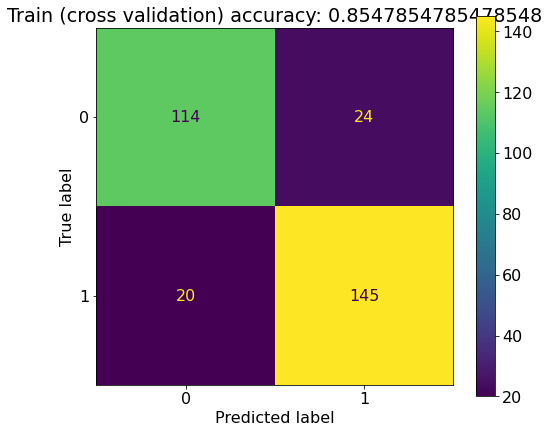

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

oSVM            = SVC(kernel='rbf', C=75, gamma=1/(2*10.22**2))
vCrossValHatY   = cross_val_predict(oSVM, dTrain, dY, cv=KFold(100, shuffle=True))
mTrainConfusion = confusion_matrix(dY, vCrossValHatY)

_, ax = plt.subplots(figsize=(8, 7))
ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(2)).plot(values_format='d', ax=ax)
plt.title('Train (cross validation) accuracy: ' + str(np.mean(dY == vCrossValHatY)))
plt.show()

### Tools to analyze classifiers:

#### Colab users should install ELI5 and SHAP with:
`!pip install eli5`  
`!pip install shap`

### ELI5 (Explain Like I'm Five):
https://eli5.readthedocs.io/en/latest/index.html

In [27]:
import eli5

oLinearSVM = SVC(kernel='linear', C=5).fit(dTrain, dY)
eli5.show_weights(oLinearSVM, feature_names=dTrain.columns.tolist(), target_names=['hearth disease', 'no hearth disease'], )

C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+0.648,ChestPainType_atypical angina
+0.499,Thalassemia_fixed defect
+0.473,ChestPainType_non-anginal pain
+0.300,StSlope_flat
+0.235,MaxHeartRateAchieved
+0.222,Thalassemia_normal
+0.211,ChestPainType_typical angina
+0.184,<BIAS>
+0.020,Age
+0.000,Cholesterol


### Single prediction inspection:

In [30]:
idx = 2
dData.iloc[idx]

Age                                       41
Sex                                   female
ChestPainType                 typical angina
RestingBloodPressure                     130
Cholesterol                              204
FastingBloodSugar        lower than 120mg/ml
RestECG                               normal
MaxHeartRateAchieved                     172
ExerciseInducedAngina                     no
StDepression                             1.4
StSlope                                 flat
NumMajorVessels                            0
Thalassemia                     fixed defect
Target                     no hearth disease
Name: 2, dtype: object

In [32]:
eli5.show_prediction(oLinearSVM, dTrain.iloc[idx], target_names=['hearth disease', 'no hearth disease'])

### SHAP (SHapley Additive exPlanations):
https://shap.readthedocs.io/en/latest/#

In [34]:
import shap
shap.initjs()

oExplainer  = shap.LinearExplainer(oLinearSVM, dTrain)
mShapValues = oExplainer.shap_values(dTrain)

#-- Single data point:
shap.force_plot(oExplainer.expected_value, mShapValues[idx,:], feature_names=dTrain.columns)

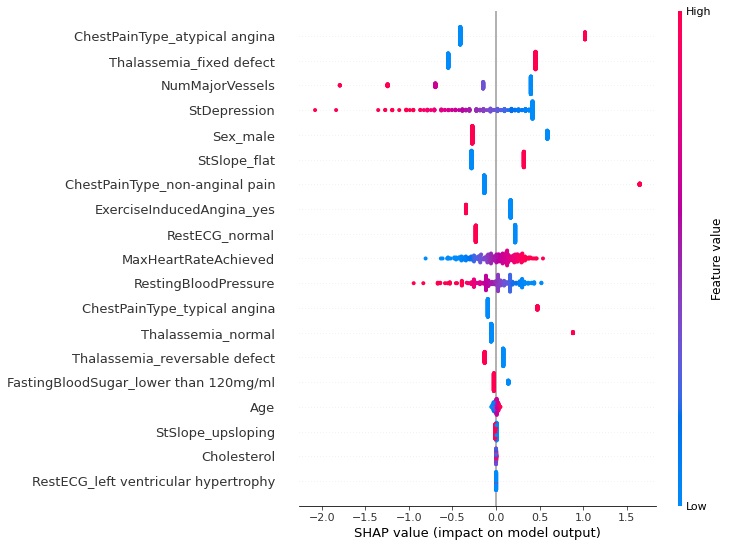

In [35]:
#-- All data:
shap.summary_plot(mShapValues, dTrain)

In [ ]:
oGaussSVM = SVC(kernel='rbf', C=25, gamma=1/(2*8**2), probability=True).fit(dTrain, dY)

oExplainer  = shap.KernelExplainer(oGaussSVM.predict_proba, dTrain)
mShapValues = oExplainer.shap_values(dTrain)

In [41]:
#-- Single data point:
shap.force_plot(oExplainer.expected_value[1], mShapValues[1][idx,:], feature_names=dTrain.columns)

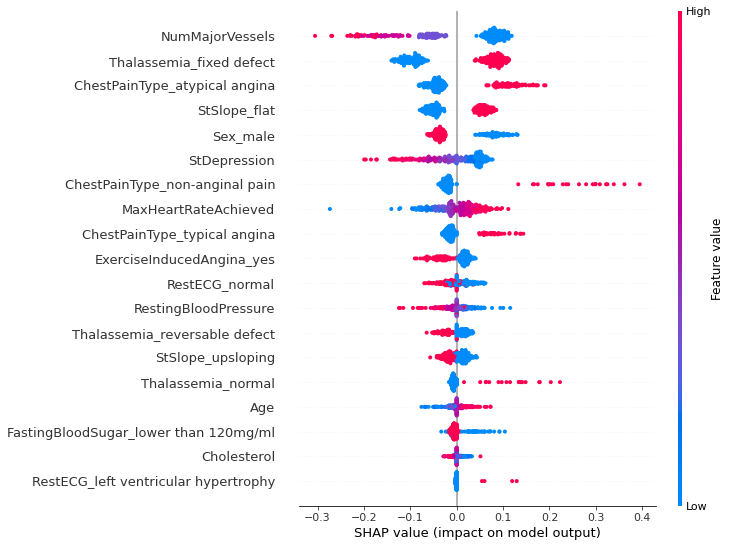

In [42]:
#-- All data:
shap.summary_plot(mShapValues[1], dTrain)